In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import warnings
import cv2
warnings.filterwarnings('ignore')

In [ ]:

baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_shape=(224, 224, 3))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

In [2]:

cascPath = os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"

In [3]:
faceCascade = cv2.CascadeClassifier(cascPath)

In [ ]:
video_capture = cv2.VideoCapture(0);
while(True):
    ret,frame = video_capture.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)

In [20]:
for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)

In [22]:
imagePaths = list(paths.list_images('C:\\Users\\ishit\\Downloads\\archive\\data'))
data = []
labels = []

for imagePath in imagePaths:
    
    label = imagePath.split(os.path.sep)[-2]
    
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [25]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [26]:
data

array([[[[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],

        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],

        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],

        ...,

        [[-0.7176471 , -0.7176471 , -0

In [28]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [17]:

INIT_LR = 1e-4
EPOCHS = 20
BS = 32
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),steps_per_epoch=len(trainX) // BS,
              validation_data=(testX, testY),validation_steps=len(testX) // BS,epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
188/188 [==============================] - 336s 2s/step - loss: 0.4490 - accuracy: 0.8053 - val_loss: 0.0861 - val_accuracy: 0.9749
Epoch 2/20
188/188 [==============================] - 212s 1s/step - loss: 0.1066 - accuracy: 0.9737
Epoch 3/20
188/188 [==============================] - 216s 1s/step - loss: 0.0712 - accuracy: 0.9802
Epoch 4/20
188/188 [==============================] - 192s 1s/step - loss: 0.0586 - accuracy: 0.9824
Epoch 5/20
188/188 [==============================] - 184s 980ms/step - loss: 0.0551 - accuracy: 0.9841
Epoch 6/20
188/188 [==============================] - 196s 1s/step - loss: 0.0415 - accuracy: 0.9868
Epoch 7/20
188/188 [==============================] - 216s 1s/step - loss: 0.0394 - accuracy: 0.9855
Epoch 8/20
188/188 [==============================] - 215s 1s/step - loss: 0.0390 - accuracy: 0.9878
Epoch 9/20
188/188 [==============================] - 217s 1s/step - loss: 0.0359 - accuracy: 0.9

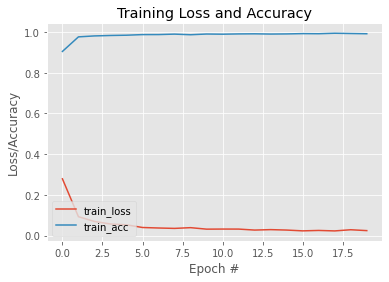

In [19]:
 
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
model.save('mask_recog_ver2.h5')

In [ ]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
 
cascPath = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
model = load_model("mask_recog_ver2.h5")
 
video_capture = cv2.VideoCapture(0)
while True:
    
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    faces_list=[]
    preds=[]
    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h,x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame =  preprocess_input(face_frame)
        faces_list.append(face_frame)
        if len(faces_list)>5:
            preds = model.predict(faces_list)
        for pred in preds:
            (mask, withoutMask) = pred
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(frame, label, (x, y- 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
 
        cv2.rectangle(frame, (x, y), (x + w, y + h),color, 2)
        
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()